In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import tensorflow as tf

In [4]:
tf.compat.v1.disable_eager_execution()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
np.random.seed(101)

In [7]:
tf.compat.v1.set_random_seed(101)

In [8]:
rand_a = np.random.uniform(0,100,(5,5))

In [9]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [10]:
rand_b = np.random.uniform(0,100,(5,1))

In [11]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [12]:
a = tf.compat.v1.placeholder(tf.float32)

In [13]:
b = tf.compat.v1.placeholder(tf.float32)

In [14]:
add_op =  a + b

In [15]:
mul_op = a * b

In [16]:
sess = tf.compat.v1.Session()

In [17]:
# add_result = sess.run(add_op, feed_dict = {a:10, b:20})
add_result = sess.run(add_op, feed_dict = {a:rand_a, b:rand_b})

In [18]:
print(add_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


In [19]:
mul_result = sess.run(mul_op, feed_dict = {a:rand_a, b:rand_b})

In [20]:
print(mul_result)

[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Example Neural Network

In [21]:
n_features = 10
n_dense_neurons = 3   

In [22]:
x = tf.compat.v1.placeholder(tf.float32, (None, n_features))

In [23]:
W = tf.compat.v1.Variable(tf.random.normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [24]:
xW = tf.matmul(x, W)

In [25]:
z = tf.add(xW, b)

In [26]:
a = tf.sigmoid(z)

In [27]:
init = tf.compat.v1.global_variables_initializer()

In [28]:
sess = tf.compat.v1.Session()

In [29]:
sess.run(init)

In [30]:
layer_out = sess.run(a, feed_dict={x:np.random.random([1,n_features])})

In [31]:
print(layer_out)

[[0.19592889 0.8423014  0.36188066]]


In [32]:
layer_out

array([[0.19592889, 0.8423014 , 0.36188066]], dtype=float32)

## Simple Regression Example

In [33]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [34]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [35]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [36]:
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

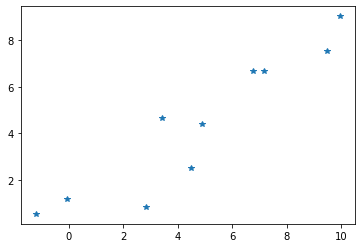

In [38]:
plt.plot(x_data, y_label, '*')

In [39]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [40]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [42]:
error = 0

for x,y in zip(x_data, y_label):
    y_hat = m*x +b
    
    error += (y-y_hat)**2

In [44]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [45]:
init = tf.compat.v1.global_variables_initializer()

In [46]:
sess = tf.compat.v1.Session()

In [47]:
sess.run(init)

In [48]:
training_steps = 1

In [52]:
for i in range(training_steps):
    sess.run(train)
final_slope, final_intercept = sess.run([m,b])

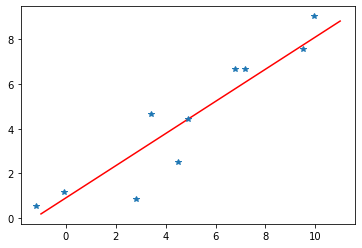

In [55]:
x_test = np.linspace(-1,11,10)

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')